# Figure 5

In [2]:
## Basics
import numpy as np
import pandas as pd
import re
import random
from scipy import stats

## Bio functions
from Bio import AlignIO
from Bio import SeqIO

## Local functions
import sys
sys.path.append("../code/scripts")
import composition as comp

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

## Colors
cscheme = {'pos':'#0177BB', 'neg':'#CB3627', 'dis':'#828282', 'helix':'#009988', 'sheet':'#EE7733', 'cr':'#AA4499',
          'null':"black"}

## Set seed for consistency
### In the future when writing code with random remember to use new methods which explicitly create generators
seed = 212121

In [3]:
all_cr_data = pd.read_csv("../data/charged_regions/cr_raw.csv", comment = "#")
FUN12s = all_cr_data[all_cr_data['gene']=="FUN12"]
FUN12s

,orf,gene,seq.len,left.bound,right.bound,region.seq,region.len,charge.asymmetry,frac.charge,kappa1,kappa2,uni_id,orf_label
11,YAL035W,FUN12,1003,62,132,MSTLKQSKKKQEKKVIEEKKDGKPILKSKKEKEKEKKEKEKQKKKE...,71,0.077293,0.577465,0.046267,0.097054,P39730,verified
12,YAL035W,FUN12,1003,169,257,LAALRRQLELKKQLEEQEKLEREEEERLEKEEEERLANEEKMKEEA...,89,0.005107,0.617978,0.053774,0.088932,P39730,verified
13,YAL035W,FUN12,1003,261,328,KVAGLAKKDGEENKPKKVVYSKKKKRTTQENASEAIKSDSKKDSEV...,68,0.001838,0.470588,0.136581,0.312018,P39730,verified


## Alphafold

In [4]:
FUN12_af = AlignIO.read('../data/eIF5B/af_eIF5B_aligned.fa', format='fasta')
FUN12_af_mat = np.asarray(FUN12_af)

# Helix-containing region position
start = 624
end = 715

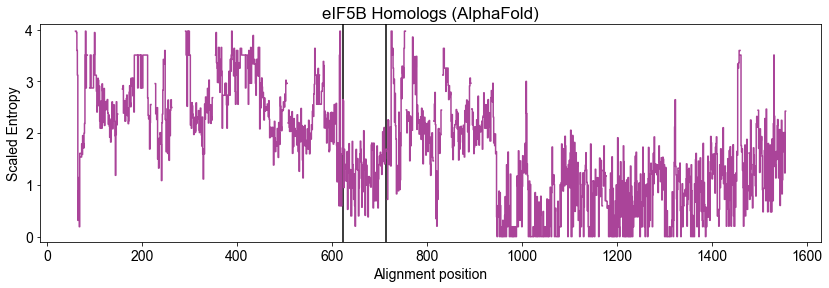

In [5]:
FUN12_af_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(FUN12_af_mat.T):
    FUN12_af_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

coverage_weights = []
    
for p, pos in enumerate(FUN12_af_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        coverage_weights.append(np.nan)
    else:
        coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, len(FUN12_af_seq_ents)),
         np.array(FUN12_af_seq_ents)*np.array(coverage_weights), color = cscheme['cr'])
plt.vlines(x = start, ymin=-5, ymax=100, color="black")
plt.vlines(x = end, ymin=-5, ymax=100, color="black")
plt.xlabel('Alignment position')
plt.ylabel('Scaled Entropy')
plt.title("eIF5B Homologs (AlphaFold)")
plt.ylim(-0.1, 4.1)
plt.show()

## AYbRAH

In [6]:
FUN12_aybrah = AlignIO.read('../data/eIF5B/aybrah_eIF5B_aligned.fa', format='fasta')
for record in FUN12_aybrah:
    outs = re.search("\s[a-z]{3}\s", record.description)
    record.id = outs.group(0).strip()

aybrah_start = 309
aybrah_end = 397

print(FUN12_aybrah[:, start:end])

FUN12_aybrah_mat = np.asarray(FUN12_aybrah)

Alignment with 32 rows and 91 columns
RSPICVIMGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATYF...SLC rgm
RSPIACILGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATYF...SLC sai
RSPICCILGHVDTGKTKLLDNLRRSNVQEGEAGGITQQIGATYF...SLC spo
RSPICCILGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATYF...SLC ncr
RSPICCILGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATYF...SLC tre
RSPICCILGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATYF...SLC ang
RSPICCILGHVDTGKTKLLDKVRQTNVQEGEAGGITQQIGATYF...SLC lst
RSPICCILGHVDTGKTKLLDKVRQTNVQEGEAGGITQQIGATYF...SLC yli
RSPICCILGHVDTGKTKLLDKVRQTNVQEGEAGGITQQIGATYF...SLC arx
RSPICCILGHVDTGKTKLLDKIRQTNVQEGEAGGITQQIGATFF...SLC nfu
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC aru
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC pta
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC ppa
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC kcp
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC car
RSPICCILGHVDTGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC opm
RSPICCILGHVDAGKTKLLDKIRQTNVQGGEAGGITQQIGATYF...SLC dbx
RSPICCILGHVDTGKTKLLDKIRQTNV

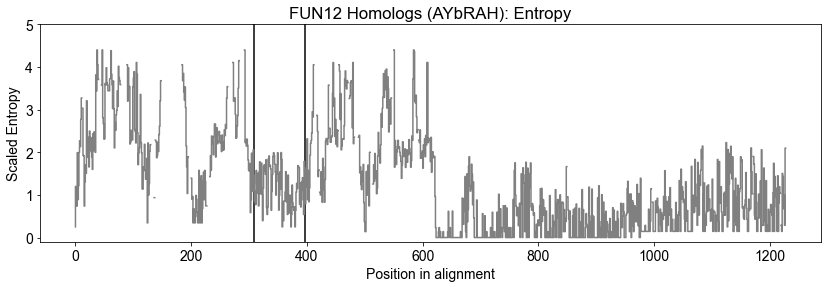

In [7]:
FUN12_aybrah_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(FUN12_aybrah_mat.T):
    FUN12_aybrah_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

coverage_weights = []
    
for p, pos in enumerate(FUN12_aybrah_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        coverage_weights.append(np.nan)
    else:
        coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, len(FUN12_aybrah_seq_ents)),
         np.array(FUN12_aybrah_seq_ents)*np.array(coverage_weights), color = 'grey')
plt.vlines(x = aybrah_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = aybrah_end, ymin=-5, ymax=100, color="black")
plt.xlabel('Position in alignment')
plt.ylabel('Scaled Entropy')
plt.title("FUN12 Homologs (AYbRAH): Entropy")
plt.ylim(-0.1, 5)
plt.show()

## OrthoDB

(This likely includes mt versions of the proteins)

In [11]:
more_FUN12s = AlignIO.read('../data/eIF5B/OrthoDB_eIF5B_atfungi_aligned_refined2.fa', format='fasta')

# Notes for finding organisms
# S. cer is 1294385_1
# The OrthoDB is H833_YJM1573A00027 (YJM1573), 

odb_start = 803
odb_end = 908

In [12]:
start2 = 0
end2 = 1325
endd = 2123

more_FUN12s_all_mat = np.asarray(more_FUN12s)[:,start2:endd]
more_FUN12_all = []

for record in more_FUN12s:
    more_FUN12_all.append(record.seq[start2:endd])

more_FUN12_all_seqs_gapped = [str(s) for s in more_FUN12_all]
more_FUN12_all_seqs = [str(s).replace('-', "") for s in more_FUN12_all]

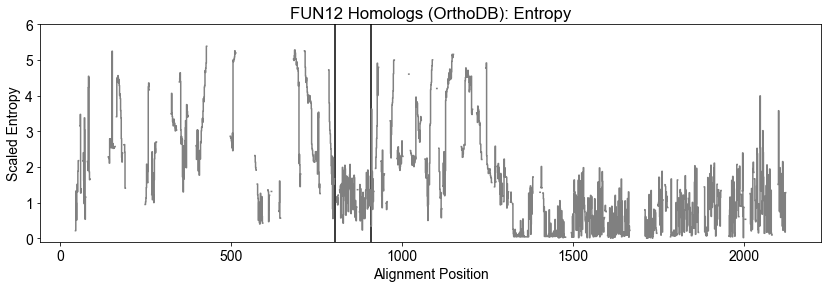

In [13]:
FUN12_all_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(more_FUN12s_all_mat.T):
    FUN12_all_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

all_coverage_weights = []
    
for p, pos in enumerate(more_FUN12s_all_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        all_coverage_weights.append(np.nan)
    else:
        all_coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
         np.array(FUN12_all_seq_ents)*np.array(all_coverage_weights), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Scaled Entropy')
plt.title("FUN12 Homologs (OrthoDB): Entropy")
plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
plt.ylim((-0.1,6))
plt.show()

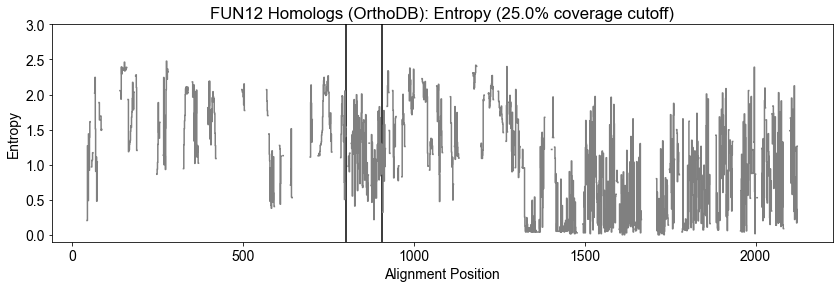

In [14]:
coverage_cutoff2 = 0.25
all_coverage_cutoffs = []
    
for p, pos in enumerate(more_FUN12s_all_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff2:
        all_coverage_cutoffs.append(np.nan)
    else:
        all_coverage_cutoffs.append(1)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
         np.array(FUN12_all_seq_ents)*np.array(all_coverage_cutoffs), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Entropy')
plt.title("FUN12 Homologs (OrthoDB): Entropy ({}% coverage cutoff)".format(coverage_cutoff2*100))
plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
plt.ylim((-0.1,3))
plt.show()

## Length variation

In [15]:
str(more_FUN12s[0].seq[50:300]).replace("-", "")

'GKNVLED'

In [16]:
# for each alignment dataset
# identify region
# iterate through rows, remove gaps, and return length

def get_region_lengths(msa, start, end):
    """
    Given an AlignIO object (msa), return a vector of the lengths of all the regions in a range from start to end 
    (inclusive) without gaps
    """
    lengths = []
    for spec in msa:
        region_seq = str(spec.seq[start:end+1]).replace("-", "")
        lengths.append(len(region_seq))
    return(lengths)

In [24]:
af_helix_lengths = get_region_lengths(FUN12_af, start, end)
aybrah_helix_lengths = get_region_lengths(FUN12_aybrah, aybrah_start, aybrah_end)
odb_helix_lengths = get_region_lengths(more_FUN12s, odb_start, odb_end)

af_comp_lengths = get_region_lengths(FUN12_af, 1230, 1310)

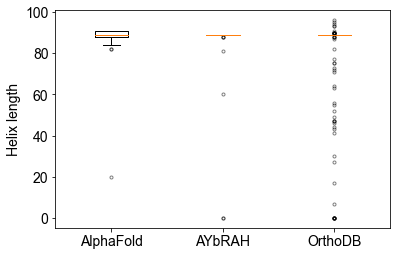

In [18]:
fig, ax = plt.subplots(figsize = (6,4))
bp = ax.boxplot([af_helix_lengths, aybrah_helix_lengths, odb_helix_lengths])
for flier in bp['fliers']:
    flier.set(marker ='.',
              color ='#e7298a',
              alpha = 0.5)
ax.set_xticklabels(['AlphaFold', 'AYbRAH', "OrthoDB"])
ax.set_ylabel("Helix length")
plt.show()

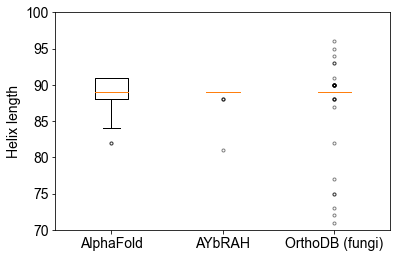

In [19]:
fig, ax = plt.subplots(figsize = (6,4))
bp = ax.boxplot([af_helix_lengths, aybrah_helix_lengths, odb_helix_lengths])
for flier in bp['fliers']:
    flier.set(marker ='.',
              color ='#e7298a',
              alpha = 0.5)
ax.set_xticklabels(['AlphaFold', 'AYbRAH', "OrthoDB (fungi)"])
ax.set_ylabel("Helix length")
ax.set_ylim(70, 100)
plt.show()

In [38]:
print(af_helix_lengths)
print(np.sqrt(np.var(af_helix_lengths)))

[84, 82, 82, 89, 89, 89, 89, 89, 85, 89, 89, 20, 89, 89, 88, 91, 91, 91, 91, 91, 91]
14.820467553468118


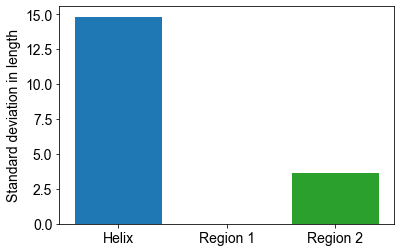

In [43]:
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x = "Helix", height=np.sqrt(np.var(af_helix_lengths)))
ax.bar(x = "Region 1", height=np.sqrt(np.var(get_region_lengths(FUN12_af, 1230, 1310))))
ax.bar(x = "Region 2", height=np.sqrt(np.var(get_region_lengths(FUN12_af, 1364, 1415))))
#sns.kdeplot(af_helix_lengths)
#sns.kdeplot(af_comp_lengths)
#sns.kdeplot(aybrah_helix_lengths)
#sns.kdeplot(odb_helix_lengths)
#ax.set_xlabel("Region length")
ax.set_ylabel("Standard deviation in length")
plt.show()

#overall protein length comparison

## Secondary Structure Prediction from Alphafold

This is a different set of proteins, but I've extracted all the predictions from alphafold annotated as "eukaryotic translation initiation factor 5B" -- this includes a couple different paralogs in the plant genomes for example.

In [44]:
import mdtraj as md

In [45]:
fun12_af_ss = {}

for struct in glob.glob('if2-alphafold/*.pdb'):
    uni_id = struct[17:23]
    s = md.load(struct)
    ss = md.compute_dssp(s, simplified=True)[0]
    fun12_af_ss[uni_id] = ss

/Users/triandafillou/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [50]:
FUN12_af = AlignIO.read('if2-alphafold/af_if2_aligned.fa', format='fasta')
for record in FUN12_af:
    record.id = record.description[5:11]

start = 624
end = 705

print(FUN12_af[:, start:end])

Alignment with 21 rows and 81 columns
PEEPEVLSGFLLKQRQEEERIAREKEEKRIREEEEKKRAAEQKI...AAE Q54XP6
AMLAK-LKQHMERQKEEEERRLREAEEEERRLREEERLAEEQRK...KDL Q4CSK4
AMLAK-LKMKMELQKAEEERLRLEAEEEERRIREEERLAEEQRK...AGK A4I9B4
--LAA-LRRQLELKKQLEEQEKLEREEEERLEKEEEERLANEEK...KKL P39730
--LAA-LKKQLELKKQLEEEQRRLEEEEEQRRLEEERLAAEEEA...KKL Q5A782
--VTA-LQKMLEEKRAREEEEQRIREEEARIAEEEKRLAEVEEA...QAL Q10251
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERLKKEEEER...AKR Q0DFG2
--VRE-MQEALARRKEAEERQKREEEERLRKEEEERLRREEEER...AKR K7V1U2
--VRE-KQETLARWKEAEDGKKKEEEERLRKEEEERRIEEERER...AAK C0SUW8
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERRRQEELER...ARR I1NH15
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERRKQEELER...ARR I1LDH2
----------------------------------------KQQI...--- F4IGQ9
--VRE-MQEALARRQEAEERKKKEEEEKLRKEEEERRRQEELEA...AQK Q9SRE1
--VRE-MQEALARRQEAEERKKKEEEEKLRKEEEERRRQEELEA...AQK F4I420
GNLSL-IKEMLKKQQEEREEQERLQKEQQERDAQEEKERLEREH...QAL G5EGT7
SMVAA-MQEQLRKRKEEEERLEREEAERIRLEDEREEARLEAVR...RAR Q9VZP5
ATVRA-MQEALAKMKEEEERAKREEEERLKRLEE

## Secondary Structure on Alignment

In [54]:
recs = []

for sp in FUN12_af:
    sequence = []
    i = 0
    for a, aa in enumerate(sp.seq):
        if aa == '-':
            sequence.append('-')
        else:
            if fun12_af_ss[sp.id][i] not in ["H", "E", "C"]:
                print(sp.id)
                print(a)
                break
            sequence.append(fun12_af_ss[sp.id][i])
            i += 1
    sequence = ''.join(sequence)        
    record = SeqIO.SeqRecord(seq = Seq(sequence), id = sp.id)
    recs.append(record)
    
fun12_ss_alignment = AlignIO.MultipleSeqAlignment(records=recs)

In [55]:
print(fun12_ss_alignment[:, start:end])

Alignment with 21 rows and 81 columns
CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q54XP6
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q4CSK4
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH A4I9B4
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH P39730
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q5A782
--CHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q10251
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q0DFG2
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH K7V1U2
--HHH-HHHHHHHHHHCCCCCCCCCCHHHHHHHHHHHHHHHHHH...HHH C0SUW8
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH I1NH15
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH I1LDH2
----------------------------------------HHHH...--- F4IGQ9
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q9SRE1
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH F4I420
CHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH G5EGT7
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q9VZP5
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [ ]:
#SeqIO.write(fun12_ss_alignment, "../data/eIF5B/eIF5B-ss-alignment.fa", "fasta")